In [28]:
import random
import numpy as np
import matplotlib.pyplot as plt

In [29]:
class GridWorld():
    def __init__(self):
        self.x = 3
        self.y = 0

    def step(self, a):
        # 상하좌우와 대각선 이동
        if a == 0:
            self.move_right()
        elif a == 1:
            self.move_left()
        elif a == 2:
            self.move_up()
        elif a == 3:
            self.move_down()
        elif a == 4:
            self.move_up_right()
        elif a == 5:
            self.move_up_left()
        elif a == 6:
            self.move_down_right()
        elif a == 7:
            self.move_down_left()

        reward = -1
        # Cliff: 리워드를 크게 감소
        if self.x == 3 and (self.y >= 1 and self.y <= 10):
            reward = -999

        done = self.is_done()
        return (self.x, self.y), reward, done

    # 오른쪽으로 이동
    def move_right(self):
        self.y += 1
        if self.y > 11:
            self.y = 11

    # 왼쪽으로 이동
    def move_left(self):
        self.y -= 1
        if self.y < 0:
            self.y = 0

    # 위로 이동
    def move_up(self):
        self.x -= 1
        if self.x < 0:
            self.x = 0

    # 아래로 이동
    def move_down(self):
        self.x += 1
        if self.x > 3:
            self.x = 3

    # 오른쪽 위로 이동 (대각선)
    def move_up_right(self):
        self.x -= 1
        self.y += 1
        if self.x < 0:
            self.x = 0
        if self.y > 11:
            self.y = 11

    # 왼쪽 위로 이동 (대각선)
    def move_up_left(self):
        self.x -= 1
        self.y -= 1
        if self.x < 0:
            self.x = 0
        if self.y < 0:
            self.y = 0

    # 오른쪽 아래로 이동 (대각선)
    def move_down_right(self):
        self.x += 1
        self.y += 1
        if self.x > 3:
            self.x = 3
        if self.y > 11:
            self.y = 11

    # 왼쪽 아래로 이동 (대각선)
    def move_down_left(self):
        self.x += 1
        self.y -= 1
        if self.x > 3:
            self.x = 3
        if self.y < 0:
            self.y = 0

    # 목표 지점에서 에피소드 종료
    def is_done(self):
        if self.x == 3 and self.y == 11:  # 목표 지점
            return True
        else:
            return False

    def get_state(self):
        return (self.x, self.y)

    def reset(self):
        self.x = 3
        self.y = 0
        return (self.x, self.y)




In [30]:
class AgentMC():
  def __init__(self):
    self.q_table = np.zeros((4,12,8)) # x size, y size, number of action
    self.eps = 0.9

  def select_action(self, s):
    ### fill your code ###
    x, y = s
    prob =  random.random()

    if prob < self.eps : # exploration
      action = random.randint(0,7)
    else: # exploitation
      action_val = self.q_table[x,y,:]
      action = np.argmax(action_val)
    return action
    ###

  def update_table(self, history, n_epi):
    cum_reward = 0
    for transition in history[::-1]:
      s,a,r,s_next = transition
      x,y = s
      
      ### fill your code ###
      self.q_table[x,y,a] = self.q_table[x,y,a] + (1/(n_epi+1)) * (cum_reward - self.q_table[x,y,a])
      cum_reward = cum_reward + r
      ###
      

  def anneal_eps(self):
    self.eps -= 0.001
    self.eps = max(self.eps, 0.01)

  def show_table(self):
    q_list = self.q_table.tolist()
    best_qvalue = np.zeros((4,12))
    best_action = np.zeros((4,12))
    for row_idx in range(len(q_list)):
      row = q_list[row_idx]
      for col_idx in range(len(row)):
        col = row[col_idx]
        qvalue = np.max(col)
        action = np.argmax(col)
        best_qvalue[row_idx, col_idx] = qvalue
        best_action[row_idx, col_idx] = action
    return best_qvalue, best_action

In [ ]:
def main():
  env = GridWorld()
  agent = AgentMC()

  for n_epi in range(20000):
    done = False
    history = []

    s = env.reset()
    while not done: # 1 episode
      a = agent.select_action(s)
      s_next, r, done = env.step(a)
      history.append((s,a,r,s_next))

      s = s_next
    agent.update_table(history, n_epi) # table update
    agent.anneal_eps()

  # result
  opt_q, opt_policy = agent.show_table()

  # Display the opt_q
  fig, ax = plt.subplots(figsize=(12, 8))
  plt.imshow(opt_policy, cmap='cool', interpolation='nearest')
  for i in range(4):
    for j in range(12):
        tempstr = "{:.2f}".format(opt_q[i][j])
        text = ax.text(j, i, tempstr, ha="center", va="center", color="k")
  plt.show()

  # Display the opt_policy
  fig, ax = plt.subplots(figsize=(12, 8))
  plt.imshow(opt_policy, cmap='cool', interpolation='nearest')
  for i in range(4):
    for j in range(12):
      if opt_policy[i][j] == 0:
        tempstr = "→" 
      elif opt_policy[i][j] == 1:
        tempstr = "←" 
      elif opt_policy[i][j] == 2:
        tempstr = "↑"  
      elif opt_policy[i][j] == 3:
        tempstr = "↓"  
      elif opt_policy[i][j] == 4:
        tempstr = "↗" 
      elif opt_policy[i][j] == 5:
        tempstr = "↖" 
      elif opt_policy[i][j] == 6:
        tempstr = "↘"  
      elif opt_policy[i][j] == 7:
        tempstr = "↙" 
      text = ax.text(j, i, tempstr, ha="center", va="center", color="k")
  plt.show()


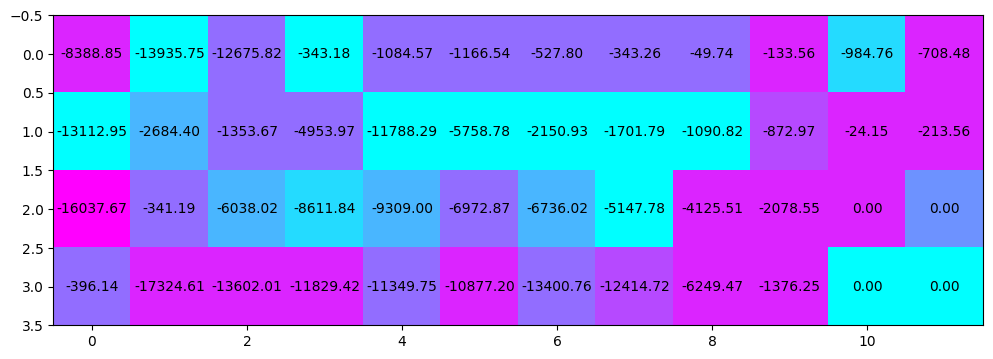

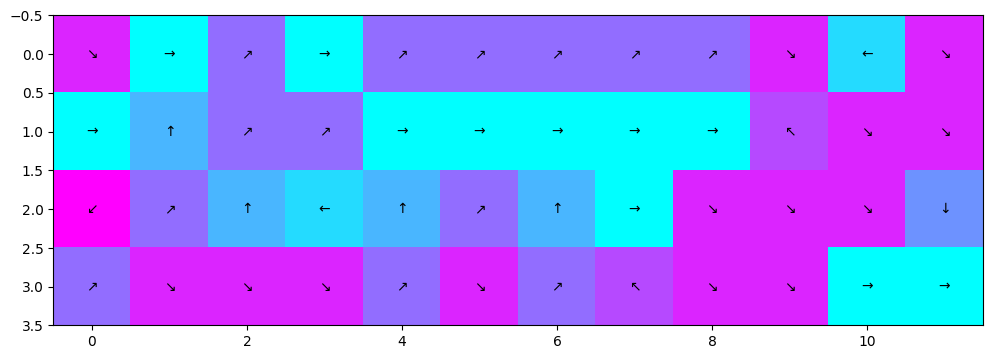

In [32]:
main()